# ETL on Boarding and Accomodation dataset

#### Importing the required packages

In [ ]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport

## 1. Data Load and Description

In [5]:
#Loading detailed Listings data for San Diego in a pandas dataframe

df_listings = pd.read_csv('C:\\Users\Antony\\Documents\\My Tableau Repository\\Datasources\\Tableau\\MadStreetDen assignment\\MSD- copy\\listings.csv')
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN


In [19]:
#Loading summary information and metrics for listings in San Diego in a pandas dataframe

df_listings_summary = pd.read_csv('C:\\Users\Antony\\Documents\\My Tableau Repository\\Datasources\\Tableau\\MadStreetDen assignment\\MSD- copy\\listings_summary.csv')
df_listings_summary.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,NaN,North Hills,32.753993,-117.129705,Entire home/apt,295,2,149,2018-10-07,1.18,1,20
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,NaN,Mission Bay,32.784304,-117.252578,Entire home/apt,2050,3,0,NaN,NaN,2,328


In [7]:
#Loading detailed Review Data for listings in San Diego in a pandas dataframe

df_reviews = pd.read_csv('C:\\Users\Antony\\Documents\\My Tableau Repository\\Datasources\\Tableau\\MadStreetDen assignment\\MSD- copy\\reviews.csv')
df_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6,8,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...
1,6,4383,2009-06-22,3762,Christine,My stay at “Craftsmen” was wonderful! Sara wa...


In [8]:
# Loading summary Review data and Listing ID in San Diego in a pandas dataframe 

df_reviews_summary = pd.read_csv('C:\\Users\Antony\\Documents\\My Tableau Repository\\Datasources\\Tableau\\MadStreetDen assignment\\MSD- copy\\reviews_summary.csv')
df_reviews_summary.head(2)

,listing_id,date
0,6,2008-06-22
1,6,2009-06-22


In [9]:
# Loading summary neighbourhood list for geo filter. in San Diego in a pandas dataframe

df_neighbourhoods = pd.read_csv('C:\\Users\Antony\\Documents\\My Tableau Repository\\Datasources\\Tableau\\MadStreetDen assignment\\MSD- copy\\neighbourhoods.csv')
df_neighbourhoods.head(2)

,neighbourhood_group,neighbourhood
0,NaN,Allied Gardens
1,NaN,Alta Vista


In [10]:
#Loading detailed Calendar Data for listings in San Diego in a pandas dataframe

df_calendar = pd.read_csv('C:\\Users\Antony\\Documents\\My Tableau Repository\\Datasources\\Tableau\\MadStreetDen assignment\\MSD- copy\\calendar.csv')
df_calendar.head(2)

,listing_id,date,available,price
0,635756,2019-11-14,t,$67.00
1,292285,2019-11-14,f,NaN



## 2. Data cleaning and transformations

### 2.1 listings and listings_summary data 

In [ ]:
prof = ProfileReport(df_listings)
prof.to_file(output_file='listings_prof.html')


Information gathered from Profile report

Number of variables = 96
Number of observations = 11922
Numeric = 27
Categorical = 55
Total Missing (%)= 15.6%

experiences_offered has constant value none, can be ignored 
has_availability has constant value t, can be ignored
host_acceptance_rate has constant value, can be ignored
host_total_listings_count is highly correlated with host_listings_count
is_business_travel_ready has constant value f, can be ignored
medium_url has constant value, can be ignored
neighbourhood_group_cleansed has 100.0% missing values
requires_license has constant value f, can be ignored
scrape_id has constant value, can be ignored
thumbnail_url has constant value, can be ignored
xl_picture_url has constant value, can be ignored

In [11]:
# Dropping columns of irrelevance based on the pandas profiling report generated 
df_listings.drop(columns=['experiences_offered','has_availability','host_acceptance_rate','host_total_listings_count','is_business_travel_ready','medium_url',"neighbourhood_group_cleansed","requires_license","scrape_id","thumbnail_url","xl_picture_url"],inplace= True)

In [12]:
df_listings.describe()

,id,host_id,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,1.192200e+04,1.192200e+04,11916.000000,11755.000000,11922.000000,11922.000000,11922.000000,11918.000000,11917.000000,11914.000000,...,9629.000000,9623.000000,9627.000000,9612.000000,9621.000000,9609.000000,9607.000000,4.800000e+01,11922.00000,9759.000000
mean,1.728569e+07,6.085778e+07,40.532561,92055.856572,32.770292,-117.181854,4.297182,1.480156,1.598641,2.309048,...,95.263994,9.706329,9.589903,9.833437,9.820809,9.751067,9.519933,9.749303e+07,10.32612,1.935757
std,8.205400e+06,5.850494e+07,188.505044,1743.770386,0.065639,0.064335,2.906190,0.880883,1.190178,1.831207,...,6.874241,0.696525,0.794416,0.577590,0.593369,0.579499,0.791108,3.547929e+08,26.20795,2.056274
min,6.000000e+00,2.900000e+01,0.000000,12345.000000,32.532614,-117.281401,1.000000,0.000000,0.000000,0.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.056300e+05,1.00000,0.010000
25%,1.159462e+07,1.224305e+07,1.000000,92101.000000,32.726506,-117.245726,2.000000,1.000000,1.000000,1.000000,...,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,6.069060e+05,1.00000,0.360000
50%,1.859936e+07,3.869078e+07,2.000000,92107.000000,32.759515,-117.168460,4.000000,1.000000,1.000000,2.000000,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.239040e+05,2.00000,1.140000
75%,2.403747e+07,9.505083e+07,7.000000,92110.000000,32.799578,-117.141241,6.000000,2.000000,2.000000,3.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.268865e+05,5.00000,2.950000
max,3.004997e+07,2.251816e+08,2488.000000,92663.000000,33.086065,-116.933520,40.000000,27.500000,25.000000,23.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.011643e+09,161.00000,18.950000


In [13]:
df_listings.isnull().sum()


id                                     0
listing_url                            0
last_scraped                           0
name                                   2
summary                              413
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   2163
Length: 85, dtype: int64

In [14]:
df_listings.shape

(11922, 85)

##### Dropping columns with excessive missing values ( Over 90% missing)

In [15]:
for cols in df_listings.columns:
    if df_listings[cols].isnull().sum() >10000:
        df_listings.drop(cols,axis=1, inplace = True)



In [16]:
df_listings[['last_scraped']].value_counts()
df_listings.drop(columns=['last_scraped'],inplace= True)

In [17]:
df_listings['price'] = df_listings['price'].replace('[\$,]','',regex=True).astype(float)

In [20]:
df_listings_summary.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.192200e+04,1.192200e+04,0.0,11922.000000,11922.000000,11922.000000,11922.000000,11922.000000,9759.000000,11922.00000,11922.000000
mean,1.728569e+07,6.085778e+07,NaN,32.770292,-117.181854,212.707851,4.653162,28.900436,1.935757,10.32612,152.486412
std,8.205400e+06,5.850494e+07,NaN,0.065639,0.064335,306.991755,14.482572,51.470547,2.056274,26.20795,131.039167
min,6.000000e+00,2.900000e+01,NaN,32.532614,-117.281401,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000
25%,1.159462e+07,1.224305e+07,NaN,32.726506,-117.245726,80.000000,1.000000,1.000000,0.360000,1.00000,22.000000
50%,1.859936e+07,3.869078e+07,NaN,32.759515,-117.168460,130.000000,2.000000,8.000000,1.140000,2.00000,132.000000
75%,2.403747e+07,9.505083e+07,NaN,32.799578,-117.141241,249.000000,3.000000,33.000000,2.950000,5.00000,287.000000
max,3.004997e+07,2.251816e+08,NaN,33.086065,-116.933520,10000.000000,500.000000,686.000000,18.950000,161.00000,365.000000


In [21]:
df_listings_summary.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_name                             6
neighbourhood_group               11922
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2160
reviews_per_month                  2163
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
df_listings_summary.drop(columns=['neighbourhood_group'],inplace= True)

In [23]:
listings = pd.merge(df_listings, df_listings_summary)


In [24]:
listings.to_csv(r'C:\\Users\Antony\\Documents\\My Tableau Repository\\Datasources\\Tableau\\MadStreetDen assignment\\MSD- copy\\listings_final.csv', index=False) 

##### Additional data cleaning on listings_final.csv have been performed in Microsoft Excel 
1. Removing duplicates 
2. Correction of spelling erros in neighbourhoods columns to avoid duplicates 


### 2.2 reviews and reviews_summary data

In [25]:
df_reviews.shape

(344404, 6)

In [26]:
df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [27]:
df_reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         417
dtype: int64

#### Removing duplicate rows 

In [31]:
df_reviews.dropna(inplace=True)

In [32]:
df_reviews.to_csv(r'C:\\Users\Antony\\Documents\\My Tableau Repository\\Datasources\\Tableau\\MadStreetDen assignment\\MSD- copy\\reviews_final.csv')

In [33]:
df_reviews_summary.shape

(344404, 2)

In [34]:
df_reviews_summary.describe()

,listing_id
count,3.444040e+05
mean,1.199821e+07
std,7.757898e+06
min,6.000000e+00
25%,5.134312e+06
50%,1.234723e+07
75%,1.843056e+07
max,2.998096e+07


In [35]:
df_reviews_summary.isnull().sum()

listing_id    0
date          0
dtype: int64

In [56]:
df_reviews_summary.describe()

,listing_id
count,3.444040e+05
mean,1.199821e+07
std,7.757898e+06
min,6.000000e+00
25%,5.134312e+06
50%,1.234723e+07
75%,1.843056e+07
max,2.998096e+07


### 2.3 calendar data 

In [36]:
df_calendar.shape


(4351530, 4)

In [37]:
df_calendar.isnull().sum()

listing_id          0
date                0
available           0
price         2533587
dtype: int64

In [38]:
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [39]:
df_calendar['price'] = df_calendar['price'].replace('[\$,]','',regex=True).astype(float)

Replacing null values in price with mode ( Given over 50% missing values, other options would be to use median or reconsider using this file data)

In [40]:
df_calendar.price.mode()


0    99.0
dtype: float64

##### Replacing missing price values with mode

In [41]:
df_calendar["price"].fillna(df_calendar["price"].mode()[0], inplace=True)

In [42]:
df_calendar.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [43]:
df_calendar.to_csv(r'C:\\Users\Antony\\Documents\\My Tableau Repository\\Datasources\\Tableau\\MadStreetDen assignment\\MSD- copy\\calendar_final.csv',index=False)

### 2.3 neighbourhoods data 

In [46]:
df_neighbourhoods.shape

(108, 2)

In [45]:
df_neighbourhoods.isnull().sum()

neighbourhood_group    108
neighbourhood            0
dtype: int64

In [64]:
df_neighbourhoods

,neighbourhood_group,neighbourhood
0,NaN,Allied Gardens
1,NaN,Alta Vista
2,NaN,Amphitheater And Water Park
3,NaN,Balboa Park
4,NaN,Bario Logan
...,...,...
103,NaN,Village Center
104,NaN,Webster
105,NaN,West University Heights
106,NaN,Wooded Area


##### All values neighbourhood_group column of neighbourhoods data is null. Will be using neighbourhood in listings data for the same intead 

# Insights


In [49]:
import matplotlib.pyplot as plt     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

<AxesSubplot:>

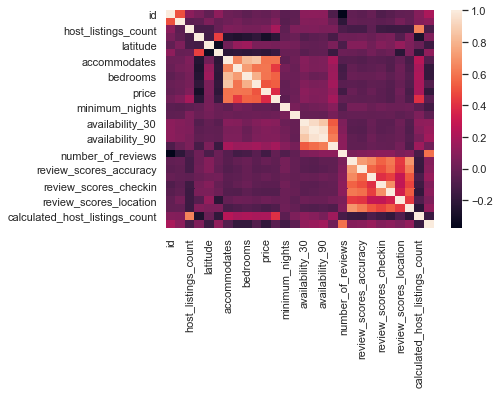

In [51]:
#Finding pearson correlation between columns 

sns.heatmap(listings.corr())


#### Correlation between price and the various fields 

In [53]:
listings[listings.columns[1:]].corr()['price'][:]

host_id                           0.005688
host_listings_count               0.070512
zipcode                          -0.288329
latitude                          0.050744
longitude                        -0.205717
accommodates                      0.597176
bathrooms                         0.605063
bedrooms                          0.602628
beds                              0.508724
price                             1.000000
guests_included                   0.379454
minimum_nights                   -0.017967
maximum_nights                    0.001885
availability_30                   0.108607
availability_60                   0.079372
availability_90                   0.073036
availability_365                  0.141081
number_of_reviews                -0.133802
review_scores_rating             -0.007245
review_scores_accuracy           -0.041817
review_scores_cleanliness        -0.007345
review_scores_checkin            -0.044920
review_scores_communication      -0.071227
review_scor

### Creating a wordcloud 

In [58]:
reviews=df_reviews["comments"]
reviews.shape

(343986,)

In [ ]:

from wordcloud import WordCloud, STOPWORDS

In [ ]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
for val in review: 
      
    val = str(val) 
  
    tokens = val.split() 
      

    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)


In [ ]:
# plot the WordCloud image                        
plt.figure(figsize = (7, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()